# Lets Grow More (Virtual Internship)

#  Exploratory Data Analysis -TASK 2 - INTERMEDIATE LEVEL

# BATCH - AUGUST

# NAME : ARYA PILLAI

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
data=pd.read_csv('Terrorism.csv',encoding='latin1')
data=pd.DataFrame(data) ###data is in latin1 instead of utf-8

C:\Users\Akhil\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [7]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [8]:
data.shape

(181691, 135)

# Cleaning the data

In [9]:
data1=data[['iyear','imonth','iday','country_txt','region_txt','provstate','city','latitude','longitude','location','summary','attacktype1_txt','targtype1_txt','gname','motive','weaptype1_txt','nkill','nwound','addnotes']]

In [10]:
data1.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [11]:
data1.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day',"country_txt":'country','region_txt':'region','provstate':'ProvinceState','gname':'GroupName','attacktype1_txt':'attack','nkill':'kill','nwound':'wounds','weaptype1_txt':'weapons','targtype1_txt':'target'},inplace=True)


C:\Users\Akhil\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [12]:
data1.head()

,Year,Month,Day,country,region,ProvinceState,city,latitude,longitude,location,summary,attack,target,GroupName,motive,weapons,kill,wounds,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [13]:
data1.isnull().sum() ## There are null values

Year                  0
Month                 0
Day                   0
country               0
region                0
ProvinceState       421
city                434
latitude           4556
longitude          4557
location         126196
summary           66129
attack                0
target                0
GroupName             0
motive           131130
weapons               0
kill              10313
wounds            16311
addnotes         153402
dtype: int64

In [14]:
#Selecting only relevant columns

In [15]:
data1['kill']=data1["kill"].fillna(0)
data1["wounds"]=data1["wounds"].fillna(0)


C:\Users\Akhil\AppData\Local\Temp/ipykernel_13348/1197945442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['kill']=data1["kill"].fillna(0)
C:\Users\Akhil\AppData\Local\Temp/ipykernel_13348/1197945442.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["wounds"]=data1["wounds"].fillna(0)


In [16]:
data['casuality']=data1['kill']+data1['wounds']

In [17]:
data1.head()

,Year,Month,Day,country,region,ProvinceState,city,latitude,longitude,location,summary,attack,target,GroupName,motive,weapons,kill,wounds,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,0.0,0.0,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,0.0,0.0,NaN


In [18]:
data1.describe()

,Year,Month,Day,latitude,longitude,kill,wounds
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [19]:
data1.region.value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region, dtype: int64

In [20]:
##On an average 2.2% people  killed  and maximum 1570 peple  killed out of 181691 and 8191 persons wounded

# Visualization of Dataset

<Figure size 432x288 with 0 Axes>

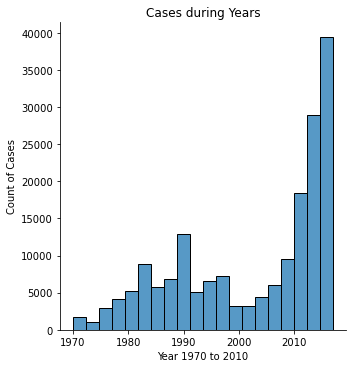

In [22]:
plt.figure()
sns.displot(data1['Year'],bins=20)###Years Vs Number of cases
plt.title('Cases during Years')
plt.xlabel('Year 1970 to 2010')
plt.ylabel('Count of Cases')
plt.show()

In [23]:
##Attacks by Year Wise


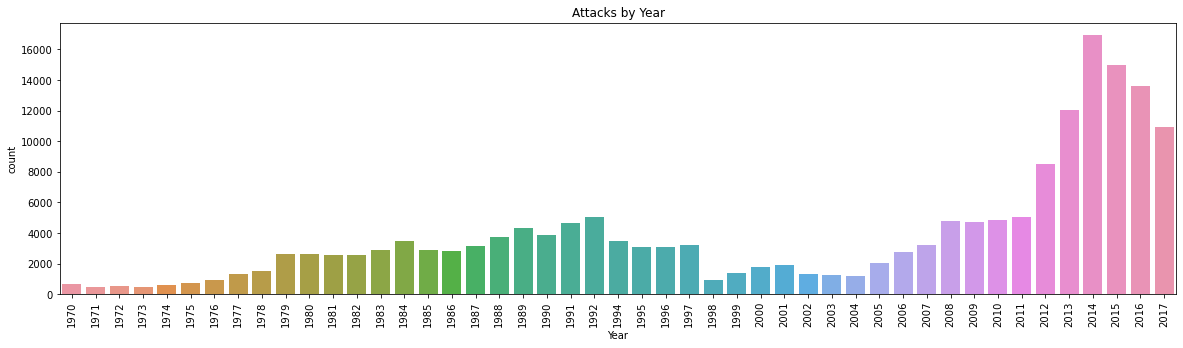

In [24]:
plt.figure(figsize=(20,5));
plt.xticks(rotation = 90)
plt.title('Attacks by Year')
sns.countplot(x=data1['Year']);

In [ ]:
## AS we can see number of attacks happen in the year 2014

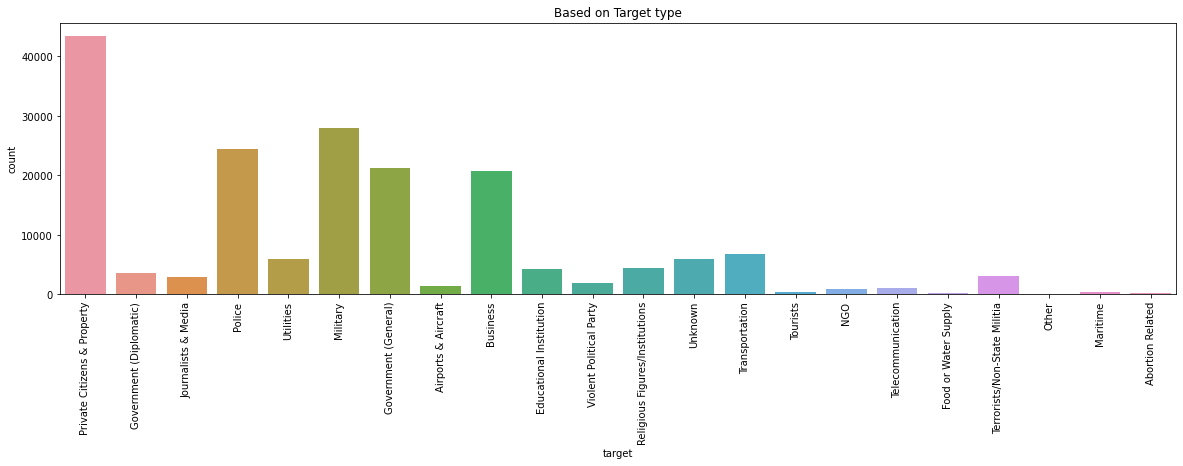

In [27]:
plt.figure(figsize=(20,5))
plt.xticks(rotation = 90)
plt.title('Based on Target type')
sns.countplot(x=data1['target']);

In [ ]:
##Maximum target terrorist attacks is Private Citizens and Property

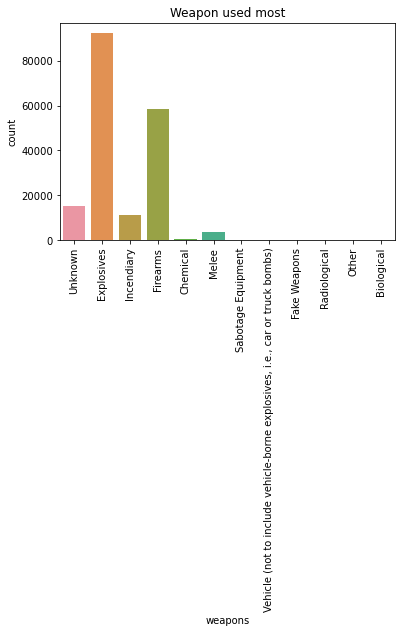

In [31]:
plt.figure()
plt.xticks(rotation=90)
plt.title('Weapon used most')
sns.countplot(x=data1['weapons'])
plt.show()

In [ ]:
##Most of the attacks are due to explosives.